In [1]:
# ans 1 :
# sample_strign = ""
# sample_strign = "write write write all the number from from from 1 to 100"
sample_strign = " I am Doing gooood gooood gooood gooood how about you you you"
count = 0 
word = ""
max_value = 0
sample_string_list = sample_strign.split()


if len(sample_strign) != 0:
    for i in range(len(sample_string_list)-1):
        if sample_string_list[i] == sample_string_list[i+1]:
            if max_value < len(sample_string_list[i]):
                max_value = len(sample_string_list[i])
                word = sample_string_list[i]
    if max_value == 0:
        output = "Not Applicable"
    else:
        output = f"word is : '{word}' , having Max length : {max_value}"
else:
    output = "invalid"

print(output)


word is : 'gooood' , having Max length : 6


In [2]:
# ans 2 :

sample_string2 = "avcdf"
# sample_string2 = "abc"
# sample_string2 = "abcc"
output2 = ""

if len(sample_string2)!= 0:
    for i in range(len(sample_string2)-1):
        # print(sample_string2[i])
        if sample_string2[i] != sample_string2[i+1]:
            output2 = "YES"
        else:
            output2 = "NO"
else:
    output2="invalid"

print(output2)

YES


In [3]:
# Answer que 3 

# imports
import pandas as pd
import json 
import os 
from selenium import webdriver
from selenium import webdriver
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings("ignore")
# link 
url_task3 = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

# storing answer 3 data
local_path = os.getcwd()+"/answer3/"
os.makedirs(local_path, exist_ok=True)

webdriver_path = os.path.join("/chromedriver.exe")
driver = webdriver.Chrome(webdriver_path)
driver.get(url_task3)
driver.maximize_window()

data = driver.find_element(By.XPATH, '/html/body/pre').text

# exporting data to json file
json_file_path = local_path+"data.json"
with open(json_file_path,"w") as f:
    f.writelines(data)

# loading the data as json data object
with open(json_file_path,"r") as f:
    data = f.read()
    # print(data)
    pokemon_data = json.loads(data)

# directly loading data to dataframe
data =  pd.json_normalize(pokemon_data["pokemon"])
df = data.copy()

# processing columns
def list_str(df_:pd.DataFrame,lable_ : str):
    """
    Observation = some of the column contains data in list 
    For converting the column which has data as list. The data will be converted to string and will be added to a new column.
    """
    try:
        df = df_.copy()
        temp_values = list()
        for i in df[lable_]:
            # print(i)
            values = ""
            if i == "":
                pass
            else:
                for j in i :
                    values += j +","
            temp_values.append(values[:-1])

        new_lable = lable_+"_converted"
        df[new_lable]=temp_values
        df = df.drop(lable_, axis=1)
        return df 
    except Exception as e:
        print("unsuppoted \n", e)

def list_str2(df_:pd.DataFrame,lable_ : str):
    """
    Observation = some of the column contains data in dictonary 
    For converting the column which has data as dictonary. The data will be converted to string and will be added to a new column.
    """
    try:    
        df = df_.copy()
        temp_values = list()
        for i in df[lable_]:
                i = str(i)
                if i == "nan" or i == "None":
                        values = "nan"
                else:
                        values = i[1:-1]
                temp_values.append(values)
        new_lable = lable_+"_converted"
        df[new_lable]=temp_values
        df = df.drop(lable_, axis=1)
        return df 
    except Exception as e:
        print("unsuppoted \n", e)

def dict_str(df_:pd.DataFrame,lable_ : str):
    try:
        df = df_.copy()
        temp_values= list()

        for i in df[lable_]:
            if type(i) == float or type(i) == int:
                value_str = "nan"
                temp_values.append(value_str)
            else:
                value_str = ""
                for j in range(len(i)):
                    value_str += i[j]["num"]+ "_" + i[j]["name"] + ","
                temp_values.append(value_str[:-1])
        new_lable = lable_+"_converted_as_num_name"
        df[new_lable]=temp_values
        df = df.drop(lable_, axis=1)
        return df 
    except Exception as e:
        print("unsuppoted \n", e)
        

# Formating data for exporting as table
df = list_str(df,"type")
df = list_str(df , "weaknesses")
df = list_str2(df , lable_="multipliers")
df = dict_str(df , lable_="next_evolution")
df = dict_str(df , lable_="prev_evolution")

# save the DataFrame to a CSV file
file_name = "pokemon.csv"
df.to_csv(local_path+file_name, index=False)

# Close the browser window
driver.quit()

print("completed.....")


completed.....


In [5]:
# Answer que 4

# imports
import pandas as pd
import json 
import os
from selenium import webdriver
from selenium import webdriver
from selenium.webdriver.common.by import By
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# link 
url_task4 = "https://data.nasa.gov/resource/y77d-th95.json"

webdriver_path = os.path.join("/chromedriver.exe")
driver = webdriver.Chrome(webdriver_path)
driver.get(url_task4)
driver.maximize_window()

# storing answer 4 data
local_path4 = os.getcwd()+"/answer4/"
os.makedirs(local_path4, exist_ok=True)
data4 = driver.find_element(By.XPATH, '/html/body/pre').text

# exporting data to json file
json_file_path4 = local_path4+"data4.json"
with open(json_file_path4,"w") as f:
    f.writelines(data4)

# loading the data as json data object
with open(json_file_path4,"r") as f:
    data4 = f.read()
    # print(data)
    meteoroids_data = json.loads(data4)

# directly loading data to dataframe
data_4 =  pd.json_normalize(meteoroids_data)
df_4 = data_4.copy()

# processing columns
def process_coordinate_4(df_:pd.DataFrame,lable_ : str):
    """
    Observation = coordinate column contains data in list 
    Converting the column to seperate columns for latitude and longitude. The data will be converted to string and will be added to a new column.
    """
    try:
        df = df_.copy()
        lat = []
        long = []
        for i in df[lable_]:
            if type(i) != list:
                lat.append(0)
                long.append(0)
            else:
                lat.append(i[0])
                long.append(i[1])

        new_lable_lati = lable_+"_latitude"
        new_lable_long = lable_+"_longitude"
        df[new_lable_lati]=lat
        df[new_lable_long]=long
        df = df.drop(lable_, axis=1)
        return df 
    except Exception as e:
        print("unsuppoted \n", e)

def convert_to_datetime(df_, lable_):
    date_format = "%Y-%m-%dT%H:%M:%S.%f"
    df_4 = df_.copy()
    date_time = []
    # Convert datetime string to pandas datetime format
    for i in df_4[lable_]:
        if type(i) ==str:
            date_string = i
            datetime_object = datetime.strptime(date_string, date_format)
            date_time.append(datetime_object)
        else:
            datetime_object=0
            date_time.append(datetime_object)
  
    df_4['date_time'] = date_time
    df_4 = df_4.drop(lable_, axis=1)


    date_sep = []
    time_sep = []
    for i in df_4['date_time']:
        if type(i)==datetime:
            str11 = str(i).split(" ")
            date_sep.append(str11[0])
            time_sep.append(str11[1])
        else:
            str11 = 0
            date_sep.append(str11)
            time_sep.append(str11)
    # Extract date and time components into separate columns
    df_4['incident_year'] = date_sep
    df_4['incident_time'] = time_sep

    df_4 = df_4.drop("date_time", axis=1)
    return df_4


df_4 = process_coordinate_4(df_=df_4,lable_="geolocation.coordinates")
df_4 = convert_to_datetime(df_=df_4, lable_="year")


# save the DataFrame to a CSV file
file_name = "meteoroids_data.csv"
df_4.to_csv(local_path4+file_name, index=False)

# Close the browser window
driver.quit()

print("completed.....")

completed.....


In [6]:
# Answer que 5

# imports
import pandas as pd
import json 
import os
from selenium import webdriver
from selenium import webdriver
from selenium.webdriver.common.by import By
from datetime import datetime
import re
import warnings
warnings.filterwarnings("ignore")

# link 
url_task5 = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

webdriver_path = os.path.join("/chromedriver.exe")
driver = webdriver.Chrome(webdriver_path)
driver.get(url_task5)
driver.maximize_window()

# storing answer 5 data
local_path5 = os.getcwd()+"/answer5/"
os.makedirs(local_path5, exist_ok=True)
data5 = driver.find_element(By.XPATH, '/html/body/pre').text

# exporting data to json file
def to_json(name_file, data_toexport):
    json_file_path5 = local_path5+name_file
    if type(data_toexport) == dict:
        temp_json= json.dumps(data_toexport, indent = 4)
        with open(json_file_path5,"w") as f:
            f.writelines(temp_json) 
    else:
        with open(json_file_path5,"w") as f:
            f.writelines(data_toexport)


def load_json(json_file_path5):
    # loading the data as json data object
   
    with open(json_file_path5,"r") as f:
        data5 = f.read()
        # print(data)
        json_data = json.loads(data5)
        return json_data


to_json(name_file="full_data5.json", data_toexport=data5)
full_tv_show_data = load_json(json_file_path5 = local_path5+"full_data5.json")

keys_data = ['id','url','name','type','language','genres','status','runtime','averageRuntime','premiered','ended','officialSite','schedule','rating','weight','network','webChannel','dvdCountry','externals','image','summary','updated','_links']
temp_for_show = dict()
for i in keys_data:
    if i == "id":
        temp_for_show[str(i)+"_show"] = full_tv_show_data[i]
    else:
        temp_for_show[i] = full_tv_show_data[i]



to_json(name_file="show_data5.json", data_toexport=temp_for_show)
tv_show_details = load_json(json_file_path5 = local_path5+"show_data5.json")


keys_eip_data = ['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime', 'airstamp', 'runtime', 'rating', 'image', 'summary', '_links']
episodes_data = full_tv_show_data["_embedded"]["episodes"]
# to_json(name_file="show_episodes_data5.json", data_toexport=str(episodes_data))
# tv_show_episodes_details = load_json(json_file_path5 = local_path5+"show_episodes_data5.json")


# processing columns
def list_str5(df_:pd.DataFrame,lable_ : str):
    """
    Observation = some of the column contains data in dictonary 
    For converting the column which has data as dictonary. The data will be converted to string and will be added to a new column.
    """
    try:
        df = df_.copy()
        temp_values = list()
        for i in df[lable_]:
            # print(i)
            values = ""
            if i == "":
                pass
            else:
                for j in i :
                    values += j +","
            temp_values.append(values[:-1])

        new_lable = lable_+"_converted"
        df[new_lable]=temp_values
        df = df.drop(lable_, axis=1)
        return df 
    except Exception as e:
        print("unsuppoted \n", e)

def remove_html_tags(df_:pd.DataFrame,lable_ : str):
    """
    This function removes the HTML tags from the input data.
    """
    pattern = r'<.*?>' 
    df_[lable_] = df_[lable_].str.replace(pattern, '')
    return df_

def split_datetime(df_:pd.DataFrame,lable_ : str):
    # extract date, time, and timezone information into separate columns
    df_['{}_date'.format(lable_)] = df_[lable_].str.split('T').str[0]
    df_['{}_time'.format(lable_)] = df_[lable_].str.split('T').str[1].str.slice(0, 8)
    df_['{}_timezone'.format(lable_)] = df_[lable_].str.split('+').str[1]
    # drop the original datetime column
    df_.drop(columns=[lable_], inplace=True)
    return df_

def convert_to_12hr(time_str):
    time_obj = datetime.strptime(time_str, '%H:%M')
    return time_obj.strftime('%I:%M %p')
    
# directly loading data to dataframe & save the DataFrame to a CSV file
os.makedirs(local_path5+"each_table\\", exist_ok=True)

data_51 =  pd.json_normalize(tv_show_details)
data_51_copy = data_51.copy()

toremove = ['genres','schedule.days']
for i in toremove:
     data_51=list_str5(data_51, i)
data_51=remove_html_tags(data_51, 'summary')

file_name1 = "tv_show_details.csv"
data_51.to_csv(local_path5+"each_table\\"+file_name1, index=False)

# ---------------------------------------------------------------------

data_52 =  pd.json_normalize(episodes_data)
data_52_copy = data_52.copy()

data_52 = remove_html_tags(data_52, 'summary')
data_52 = split_datetime(data_52,lable_="airstamp")

file_name2 = "tv_show_episode_details.csv"
data_52.to_csv(local_path5+"each_table\\"+file_name2, index=False)

# final output
output_expected = ['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
        'runtime', 'summary', 'rating.average', 'image.medium',
        'image.original']
file_name3 = "Final_tvshow_details.csv"
final_df = data_52[output_expected]
final_df['airtime'] = final_df['airtime'].apply(convert_to_12hr)
final_df.to_csv(local_path5+file_name3, index=False)

# Close the browser window
driver.quit()

print(" \n \nseperate csv's are created for collecting necessay details in folder each_table and is properly corrected for ready to use")
print("completed.....")

 
 
seperate csv's are created for collecting necessay details in folder each_table and is properly corrected for ready to use
completed.....


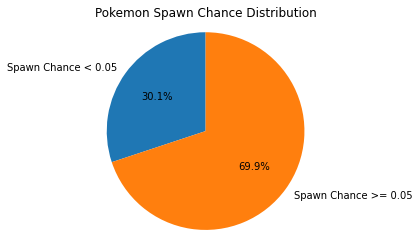

Pokemon with low spawn rate:
      num        name
1      2     Ivysaur
2      3    Venusaur
4      5  Charmeleon
5      6   Charizard
7      8   Wartortle
..   ...         ...
145  146     Moltres
147  148   Dragonair
148  149   Dragonite
149  150      Mewtwo
150  151         Mew

[65 rows x 2 columns]


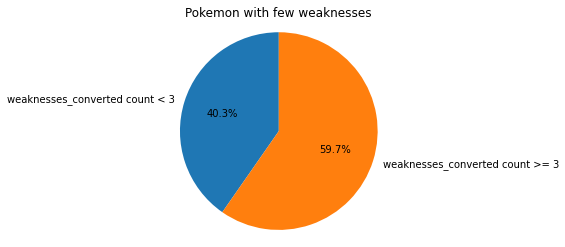


Pokemon with few weaknesses:
      num        name weaknesses_converted
3      4  Charmander    Water,Ground,Rock
4      5  Charmeleon    Water,Ground,Rock
5      6   Charizard  Water,Electric,Rock
6      7    Squirtle       Electric,Grass
7      8   Wartortle       Electric,Grass
..   ...         ...                  ...
145  146     Moltres  Water,Electric,Rock
146  147     Dratini     Ice,Dragon,Fairy
147  148   Dragonair     Ice,Dragon,Fairy
149  150      Mewtwo       Bug,Ghost,Dark
150  151         Mew       Bug,Ghost,Dark

[102 rows x 3 columns]


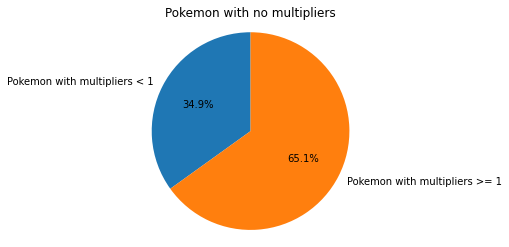


Pokemon with no multipliers:
      num        name multipliers_converted
2      3    Venusaur                   NaN
5      6   Charizard                   NaN
8      9   Blastoise                   NaN
11    12  Butterfree                   NaN
14    15    Beedrill                   NaN
..   ...         ...                   ...
144  145      Zapdos                   NaN
145  146     Moltres                   NaN
148  149   Dragonite                   NaN
149  150      Mewtwo                   NaN
150  151         Mew                   NaN

[81 rows x 3 columns]


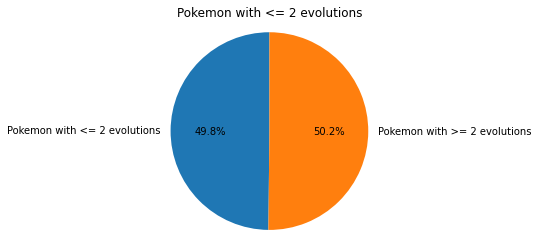


Pokemon with <= 2 evolutions:
      num        name prev_evolution_converted_as_num_name  \
0      1   Bulbasaur                                  NaN   
1      2     Ivysaur                        001_Bulbasaur   
2      3    Venusaur            001_Bulbasaur,002_Ivysaur   
3      4  Charmander                                  NaN   
4      5  Charmeleon                       004_Charmander   
..   ...         ...                                  ...   
146  147     Dratini                                  NaN   
147  148   Dragonair                          147_Dratini   
148  149   Dragonite            147_Dratini,148_Dragonair   
149  150      Mewtwo                                  NaN   
150  151         Mew                                  NaN   

    next_evolution_converted_as_num_name  
0               002_Ivysaur,003_Venusaur  
1                           003_Venusaur  
2                                    NaN  
3           005_Charmeleon,006_Charizard  
4                   

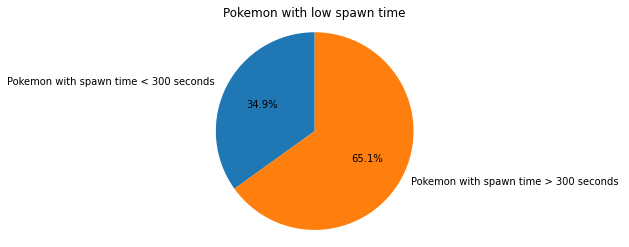


Pokemon with low spawn time:
      num       name spawn_time
6      7   Squirtle      04:25
8      9  Blastoise      00:06
10    11    Metapod      02:11
12    13     Weedle      02:21
13    14     Kakuna      02:30
..   ...        ...        ...
143  144   Articuno        NaN
144  145     Zapdos        NaN
145  146    Moltres        NaN
149  150     Mewtwo        NaN
150  151        Mew        NaN

[81 rows x 3 columns]


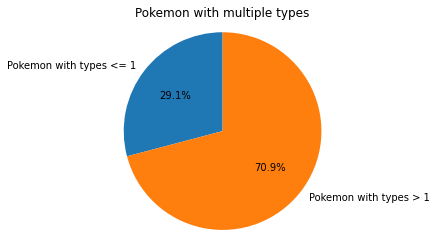


Pokemon with multiple types:
      num        name   type_converted
0      1   Bulbasaur     Grass,Poison
1      2     Ivysaur     Grass,Poison
2      3    Venusaur     Grass,Poison
5      6   Charizard      Fire,Flying
11    12  Butterfree       Bug,Flying
..   ...         ...              ...
141  142  Aerodactyl      Rock,Flying
143  144    Articuno       Ice,Flying
144  145      Zapdos  Electric,Flying
145  146     Moltres      Fire,Flying
148  149   Dragonite    Dragon,Flying

[62 rows x 3 columns]


In [7]:
# Answer que 6

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pokemon_df = pd.read_csv(local_path+"pokemon.csv")

def answer1():
    # ans 1
    low_spawn_pokemon = pokemon_df[pokemon_df['spawn_chance'] < 0.05]
    labels1 = ['Spawn Chance < 0.05', 'Spawn Chance >= 0.05']
    sizes1 = [len(low_spawn_pokemon), len(pokemon_df)]
    # Plot
    plt.pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=90)
    # Show plot
    plt.axis('equal')
    plt.title('Pokemon Spawn Chance Distribution')
    plt.show()
    print("Pokemon with low spawn rate:\n", low_spawn_pokemon[['num', 'name']])

def answer2():
    # ans 2
    few_weakness_pokemon = pokemon_df[pokemon_df['weaknesses_converted'].str.count(',') < 3]
    labels2 = ['weaknesses_converted count < 3', 'weaknesses_converted count >= 3']
    sizes2 = [len(few_weakness_pokemon), len(pokemon_df)]
    # Plot
    plt.pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90)
    # Show plot
    plt.axis('equal')
    plt.title('Pokemon with few weaknesses')
    plt.show()
    print("\nPokemon with few weaknesses:\n", few_weakness_pokemon[['num', 'name', 'weaknesses_converted']])

def answer3():
    # ans 3
    no_multiplier_pokemon = pokemon_df[pokemon_df['multipliers_converted'].isna()]
    labels3 = ['Pokemon with multipliers < 1', 'Pokemon with multipliers >= 1']
    sizes3 = [len(no_multiplier_pokemon), len(pokemon_df)]
    # Plot
    plt.pie(sizes3, labels=labels3, autopct='%1.1f%%', startangle=90)
    # Show plot
    plt.axis('equal')
    plt.title('Pokemon with no multipliers')
    plt.show()
    print("\nPokemon with no multipliers:\n", no_multiplier_pokemon[['num', 'name', 'multipliers_converted']])

def answer4():
    # ans 4
    few_evolutions_pokemon = pokemon_df[pokemon_df['next_evolution_converted_as_num_name'].isna() | (pokemon_df['next_evolution_converted_as_num_name'].str.count(',') < 2)]
    labels4 = ['Pokemon with <= 2 evolutions', 'Pokemon with >= 2 evolutions']
    sizes4 = [len(few_evolutions_pokemon), len(pokemon_df)]
    # Plot
    plt.pie(sizes4, labels=labels4, autopct='%1.1f%%', startangle=90)
    # Show plot
    plt.axis('equal')
    plt.title('Pokemon with <= 2 evolutions')
    plt.show()
    print("\nPokemon with <= 2 evolutions:\n", few_evolutions_pokemon[['num', 'name', 'prev_evolution_converted_as_num_name', 'next_evolution_converted_as_num_name']])

def answer5():
        # ans 5
        def convert_to_seconds(time_str):
                minutes, seconds = map(int, time_str.split(':'))
                return minutes * 60 + seconds
        pokemon_df['spawn_time_seconds'] = pokemon_df['spawn_time'].fillna(value="00:00").apply(convert_to_seconds)
        low_spawn_time_pokemon = pokemon_df[pokemon_df['spawn_time_seconds'] < 300]
        labels4 = ['Pokemon with spawn time < 300 seconds ', 'Pokemon with spawn time > 300 seconds ']
        sizes4 = [len(low_spawn_time_pokemon), len(pokemon_df)]
        # Plot
        plt.pie(sizes4, labels=labels4, autopct='%1.1f%%', startangle=90)
        # Show plot
        plt.axis('equal')
        plt.title('Pokemon with low spawn time')
        plt.show()
        print("\nPokemon with low spawn time:\n", low_spawn_time_pokemon[['num', 'name', 'spawn_time']])

def answer6():
    # ans 6
    multiple_type_pokemon = pokemon_df[pokemon_df['type_converted'].str.count(',') >= 1]
    labels6 = ['Pokemon with types <= 1', 'Pokemon with types > 1']
    size6 = [len(multiple_type_pokemon), len(pokemon_df)]
    # Plot
    plt.pie(size6, labels=labels6, autopct='%1.1f%%', startangle=90)
    # Show plot
    plt.axis('equal')
    plt.title('Pokemon with multiple types')
    plt.show()
    print("\nPokemon with multiple types:\n", multiple_type_pokemon[['num', 'name', 'type_converted']])

answer1()
answer2()
answer3()
answer4()
answer5()
answer6()


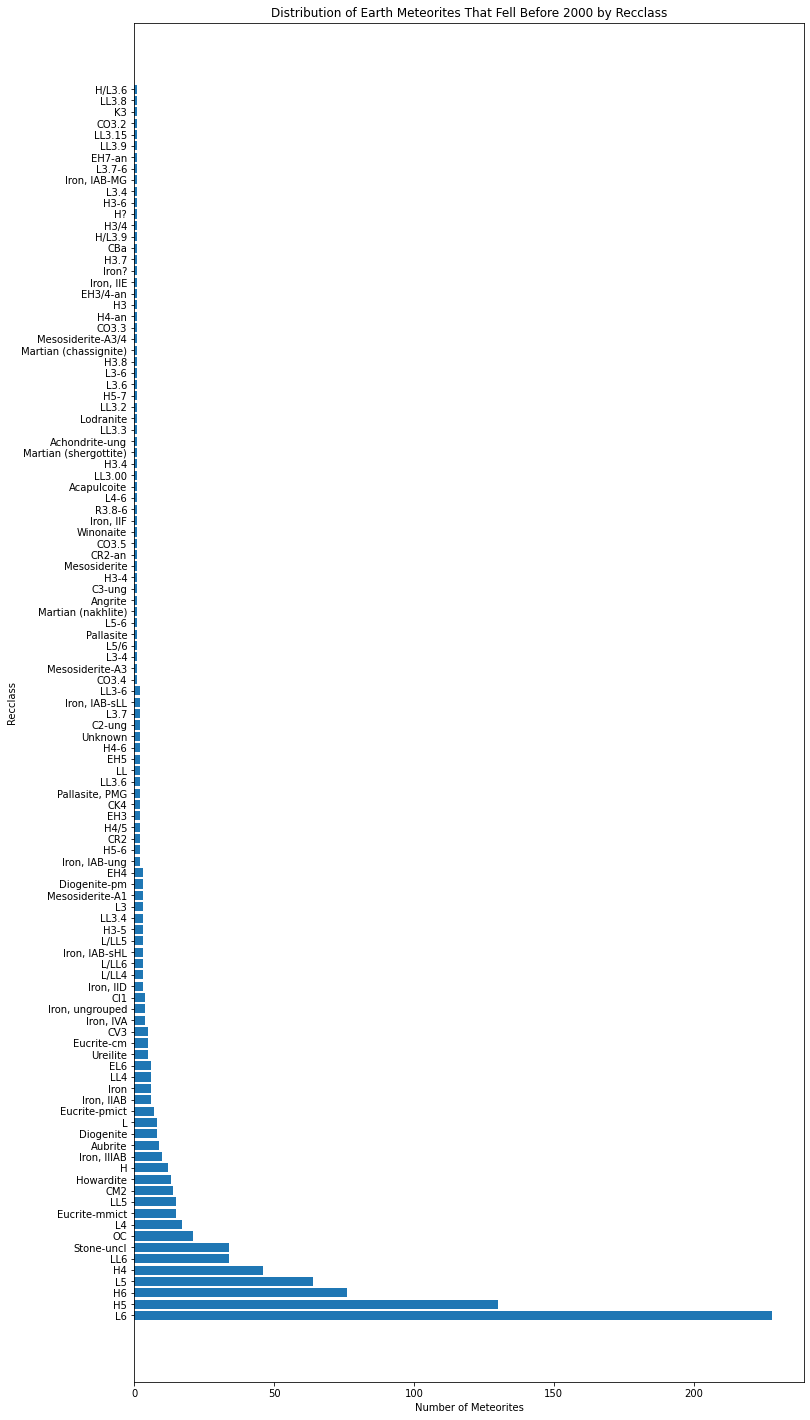


Earth Meteorites That Fell Before 2000 by Recclass:
     incident_year
0      1880-01-01
1      1951-01-01
2      1952-01-01
3      1976-01-01
4      1902-01-01
..            ...
994    1807-01-01
995    1934-01-01
997    1869-01-01
998    1922-01-01
999    1905-01-01

[930 rows x 1 columns]
Earth meteorites co-ordinates who fell before the year 1970
Note : this will require libraries

Earth meteorites co-ordinates who fell before the year 1970:
      geolocation.coordinates_latitude  geolocation.coordinates_longitude
0                             6.08333                           50.77500
1                            10.23333                           56.18333
2                          -113.00000                           54.21667
4                           -64.95000                          -33.16667
5                            71.80000                           32.10000
..                                ...                                ...
994                          35.20000

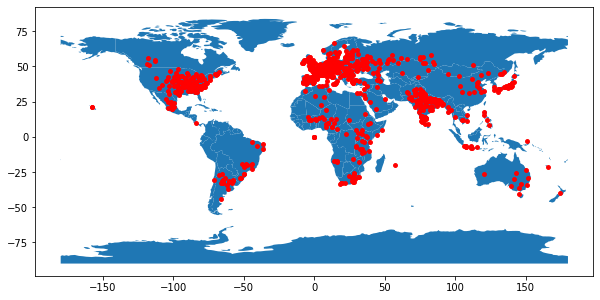

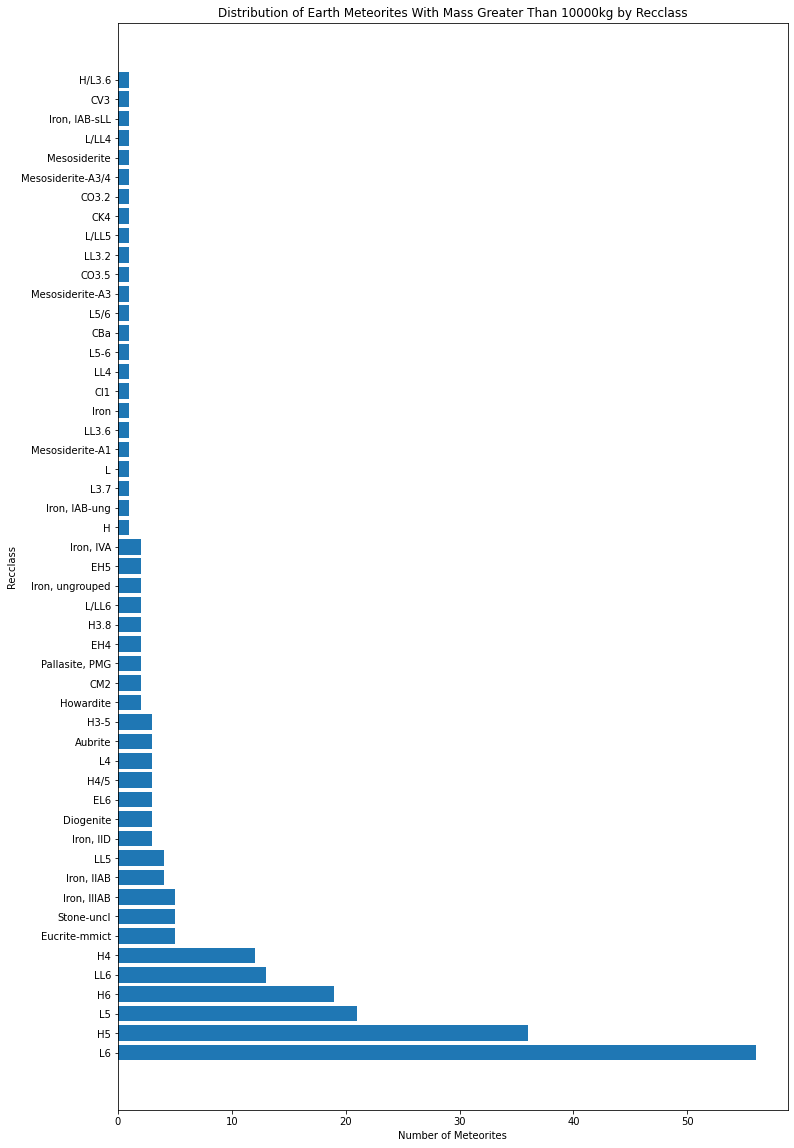





Meteorites with mass greater than 10000kg:
          mass
2    107000.0
7     30000.0
11    24000.0
16    50000.0
27   228000.0
..        ...
991   28000.0
992   74800.0
994   65500.0
997   20000.0
998   16500.0

[243 rows x 1 columns]


In [8]:

# Answer que 7

# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df_org = pd.read_csv(local_path4+"meteoroids_data.csv")
df = df_org.copy()
def answer7_1():
    # filter the data to get meteorites that fell before the year 2000
    df_filtered = df[df["incident_year"] < "2000"]
    # count the number of meteorites for each recclass
    counts = df_filtered["recclass"].value_counts()
    # plot the horizontal bar chart
    plt.figure(figsize=(12,25))
    plt.barh(counts.index, counts.values)
    plt.title("Distribution of Earth Meteorites That Fell Before 2000 by Recclass")
    plt.xlabel("Number of Meteorites")
    plt.ylabel("Recclass")
    plt.show()
    print("\nEarth Meteorites That Fell Before 2000 by Recclass:\n", df_filtered[['incident_year']])


try:
    import pandas as pd
    from shapely.geometry import Point
    import geopandas as gpd
    from geopandas import GeoDataFrame
except ImportError:
    !pip install pandas shapely geopandas
    import pandas as pd
    from shapely.geometry import Point
    import geopandas as gpd
    from geopandas import GeoDataFrame

def answer7_2():
    print("Earth meteorites co-ordinates who fell before the year 1970")
    print("Note : this will require libraries")
    df_filtered = df[df["incident_year"] < "1970"]
    geometry = [Point(xy) for xy in zip(df_filtered['geolocation.coordinates_latitude'], df_filtered['geolocation.coordinates_longitude'])]
    gdf = GeoDataFrame(df_filtered, geometry=geometry)   
    #this is a simple map that goes with geopandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
    print("\nEarth meteorites co-ordinates who fell before the year 1970:\n", df_filtered[['geolocation.coordinates_latitude','geolocation.coordinates_longitude']])
    


def answer7_3():
    # filter the data to get meteorites with mass greater than 10000kg
    df_filtered = df[df["mass"] > 10000]
    # count the number of meteorites for each recclass
    counts = df_filtered["recclass"].value_counts()
    # plot the horizontal bar chart
    plt.figure(figsize=(12,20))
    plt.barh(counts.index, counts.values)
    plt.title("Distribution of Earth Meteorites With Mass Greater Than 10000kg by Recclass")
    plt.xlabel("Number of Meteorites")
    plt.ylabel("Recclass")
    plt.show()
    print("\n\n")
    print("\nMeteorites with mass greater than 10000kg:\n", df_filtered[['mass']])



answer7_1()
answer7_2()
answer7_3()


Overall ratings for each season compare plot : 


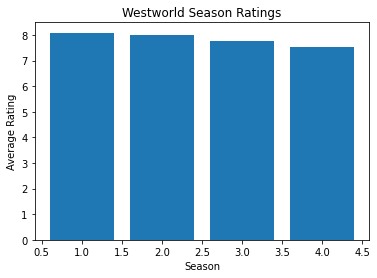

Episode names, whose average rating is more than 8 for every season : 
Season 1:
['The Bicameral Mind', 'The Well-Tempered Clavier', "Trompe L'Oeil"]

Season 2:
['Kiksuya', 'The Passenger', 'Vanishing Point']

Episode names that aired before May 2019 : 
Episode names :
The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger
Episode name from each season with the highest and lowest rating
Season 1:
Highest rated episode: The Bicameral Mind (average rating: 8.7)
Lowest rated episode: The Stray (average rating: 7.6)

Season 2:
Highest rated episode: Kiksuya (average rating: 8.7)
Lowest rated episode: Akane No Mai (average rating: 7.6)

Season 3:
Highest rated episode: Parce Domine (average rating: 8.0)
Lowest rated episode: Decoherence (average rating: 7.5)


In [9]:

# Answer que 8

# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

df_org8 = pd.read_csv(local_path5+"Final_tvshow_details.csv")
df = df_org8.copy()

def answer8_1():
    print("Overall ratings for each season compare plot : ")
    season_ratings = df.groupby('season')['rating.average'].mean()
    plt.bar(season_ratings.index, season_ratings.values )
    plt.xlabel('Season')
    plt.ylabel('Average Rating')
    plt.title('Westworld Season Ratings')
    plt.show()

def answer8_2():
    print("Episode names, whose average rating is more than 8 for every season : ")
    episode_ratings = df.groupby(['season', 'name'])['rating.average'].mean().reset_index()
    highly_rated_episodes = episode_ratings[episode_ratings['rating.average'] > 8].groupby('season')['name'].apply(list)
    for season, episodes in highly_rated_episodes.iteritems():
        print(f'Season {season}:')
        print(episodes)
        print()


def answer8_3():
    print("Episode names that aired before May 2019 : ")
    df['airdate'] = pd.to_datetime(df['airdate'])
    filtered_df = df[df['airdate'] < '2019-05']
    episode_names = filtered_df['name'].tolist()
    print("Episode names :")
    for name in episode_names:
        print(name)

def answer8_4():
    print("Episode name from each season with the highest and lowest rating")
    highest_rated_episodes = df.loc[df.groupby('season')['rating.average'].idxmax()][['season', 'name', 'rating.average']]
    lowest_rated_episodes = df.loc[df.groupby('season')['rating.average'].idxmin()][['season', 'name', 'rating.average']]
    for season in set(df['season']):
        print(f'Season {season}:')
        print(f'Highest rated episode: {highest_rated_episodes[highest_rated_episodes["season"] == season]["name"].values[0]} (average rating: {highest_rated_episodes[highest_rated_episodes["season"] == season]["rating.average"].values[0]})')
        print(f'Lowest rated episode: {lowest_rated_episodes[lowest_rated_episodes["season"] == season]["name"].values[0]} (average rating: {lowest_rated_episodes[lowest_rated_episodes["season"] == season]["rating.average"].values[0]})')
        print()

def answer8_5():
    print("Summary for the most popular ( as per ratings ) episode in every season")
    most_popular_episodes = df.loc[df.groupby('season')['rating.average'].idxmax()][['season', 'name', 'summary']]
    for season in set(df['season']):
        print(f'Season {season}:')
        print(most_popular_episodes[most_popular_episodes['season']==season]['summary'].values[0])
        print()

answer8_1()
answer8_2()
answer8_3()
answer8_4()
answer8_5()



In [23]:
# Answer que 9

# imports
import pandas as pd
import json 
import os
import warnings
warnings.filterwarnings("ignore")

# link 
# url_task9 = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"


# storing answer 5 data
local_path9 = os.getcwd()+"/answer9/"
# os.makedirs(local_path5, exist_ok=True)
df9 = pd.read_csv(local_path9+"Electric_Vehicle_Population_Data.csv")

def answer9_1():
    list_of_cars = []
    for i in range(len(df9["Clean Alternative Fuel Vehicle (CAFV) Eligibility"])):
        if df9["Clean Alternative Fuel Vehicle (CAFV) Eligibility"][i] !="Clean Alternative Fuel Vehicle Eligible":
            car_details = (df9['Make'][i] , df9['Model'][i] , df9['Electric Vehicle Type'][i])
            list_of_cars.append(car_details)
    print("The cars and their types that do not qualify for clean alternative fuel vehicle : \n")
    return pd.DataFrame(list_of_cars, columns= ["Make" , "Model" , "Electric Vehicle Type"])

def answer9_2():
    list_of_cars = []
    for i in range(len(df9["Make"])):
        if df9["Make"][i] == "TESLA" and df9["City"][i] == "Bothell":
            car_details = (df9['Make'][i] , df9['Model Year'][i], df9['Model'][i] , df9['Electric Vehicle Type'][i])
            list_of_cars.append(car_details)
    print("TESLA cars with the model year, and model type made in Bothell City : \n")
    return pd.DataFrame(list_of_cars, columns= ["Make" , "Model Year", "Model" , "Electric Vehicle Type"])

def answer9_3():
    filtered_df = df9[(df9['Electric Range'] > 100) & (df9['Model Year'] > 2015)]
    print("Cars that have an electric range of more than 100 and were made after 2015 : \n")
    return filtered_df

def answer9_4():
    print("The distribution between city and electric vehicle type :")
    df_copy = pd.DataFrame(df9.groupby("City")["Electric Vehicle Type"].count())
    fig, ax = plt.subplots(figsize=(12,80))
    df_copy.plot(kind='barh', legend=None,ax=ax)
    plt.title('Number of Electric Vehicles by City')
    plt.xlabel('City')
    plt.ylabel('Count')
    plt.show()


In [24]:
answer9_1()


The cars and their types that do not qualify for clean alternative fuel vehicle : 



,Make,Model,Electric Vehicle Type
0,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
1,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
2,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
3,TESLA,MODEL Y,Battery Electric Vehicle (BEV)
4,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
...,...,...,...
69887,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV)
69888,TESLA,MODEL Y,Battery Electric Vehicle (BEV)
69889,NISSAN,LEAF,Battery Electric Vehicle (BEV)
69890,TESLA,MODEL Y,Battery Electric Vehicle (BEV)


In [25]:
answer9_2()


TESLA cars with the model year, and model type made in Bothell City : 



,Make,Model Year,Model,Electric Vehicle Type
0,TESLA,2020,MODEL 3,Battery Electric Vehicle (BEV)
1,TESLA,2022,MODEL 3,Battery Electric Vehicle (BEV)
2,TESLA,2022,MODEL Y,Battery Electric Vehicle (BEV)
3,TESLA,2018,MODEL 3,Battery Electric Vehicle (BEV)
4,TESLA,2017,MODEL X,Battery Electric Vehicle (BEV)
...,...,...,...,...
2402,TESLA,2019,MODEL 3,Battery Electric Vehicle (BEV)
2403,TESLA,2021,MODEL 3,Battery Electric Vehicle (BEV)
2404,TESLA,2014,MODEL S,Battery Electric Vehicle (BEV)
2405,TESLA,2022,MODEL 3,Battery Electric Vehicle (BEV)


In [26]:
answer9_3()


Cars that have an electric range of more than 100 and were made after 2015 : 



,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130417,5YJYGDEE5L,Pierce,Tacoma,WA,98444.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,29.0,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


The distribution between city and electric vehicle type :


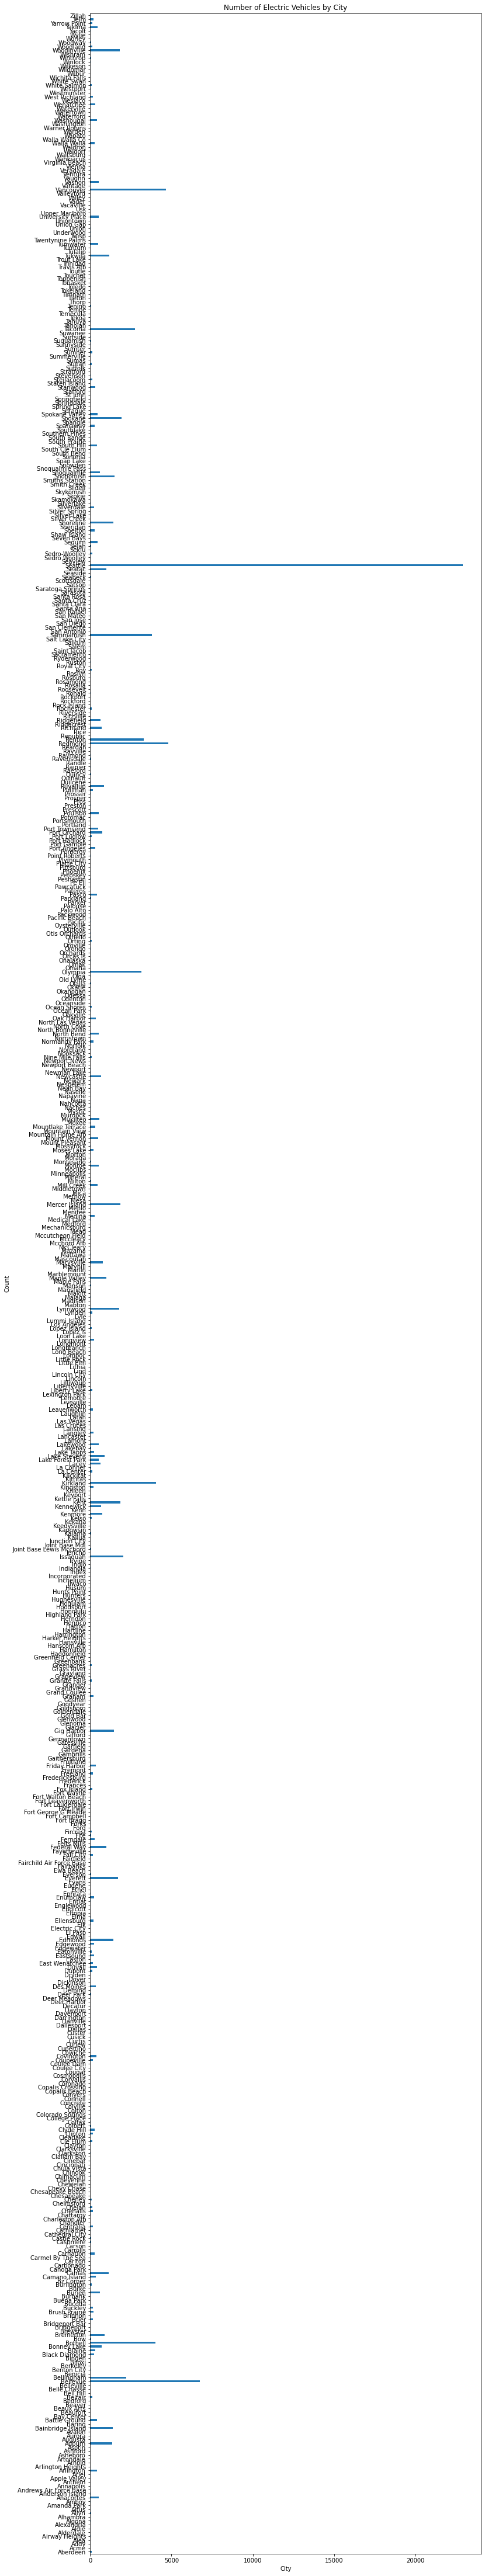

In [27]:
answer9_4()